## Praca domowa nr 6, Bartosz Jamrozy

In [93]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
faces = fetch_olivetti_faces()

In [42]:
# plot fiew photo 
def plot_gallery(title, images,index, nrows=4, ncols=5):
    plt.figure(figsize=(10,5))
    plt.suptitle(title, size=16)
    for i,j in enumerate(index):
        ax = plt.subplot(nrows, ncols, i + 1)
        ax.matshow(images[j].reshape((64, 64)))
        plt.xticks([]); 
        plt.yticks([])
        plt.title(j)
    plt.show()

In [84]:
# plot original photo and transformed
def plot_two(data_1,data_2,i,title="",title_1="",title_2=""):
    plt.figure(figsize=(10,5))
    plt.suptitle(title, size=16)
    #plt.gray()

    nrows=1
    ncols=2
    ax = plt.subplot(nrows, ncols, 1)
    ax.matshow(data_1[i].reshape((64, 64)))
    plt.xticks([]); 
    plt.yticks([])
    plt.title(title_1)
        
    ax = plt.subplot(nrows, ncols, 2)
    ax.matshow(data_2[i].reshape((64, 64)))
    plt.xticks([]); 
    plt.yticks([])
    plt.title(title_2)
        
    plt.show()

In [157]:
# boxplot rmse error 
def plot_rmse_error(data_1,data_2,title=""):
    n=len(data_2)
    rmse1 = []
    for i in range(n):
        rmse1.append(mean_squared_error(data_1[i],data_2[i],squared=False))
    sns.boxplot(rmse1) 
    plt.show()

### Orginalne obrazy

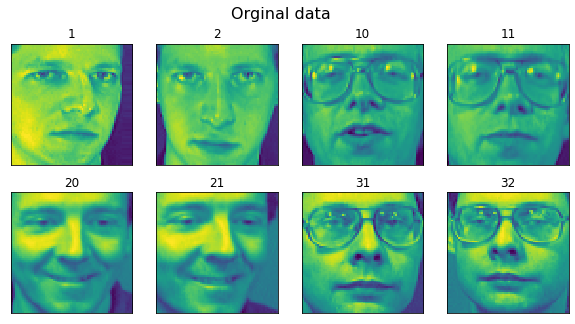

In [45]:
fig_index=[1,2,10,11,20,21,31,32]
fig_row=2
fig_col=4
plot_gallery("Orginal data",faces.data,fig_index,fig_row,fig_col)


Przykładowe obrazy za zbioru 

### PCA

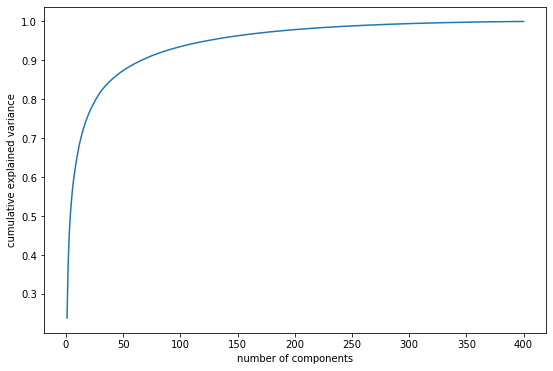

In [25]:
pca =  PCA().fit(faces.data)

plt.figure(figsize=(9,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Wybierzmy liczbę komponentów na 200

In [73]:
n_comp=200
k=np.cumsum(PCA(n_components=n_comp).fit(faces.data).explained_variance_ratio_)[-1]
print (str(n_comp) + " componentów wyjaśnia " + str(k) + " wariancji")

200 componentów wyjaśnia 0.97880447 wariancji


In [74]:
pca =  PCA(n_components=n_comp).fit(faces.data)
data_pca=pca.transform(faces.data)

### stopień kompresji

In [75]:
cr=len(faces.data[0])/n_comp
print("Stopień komprsji: " + str(cr))

Stopień komprsji: 20.48


### inverse transform

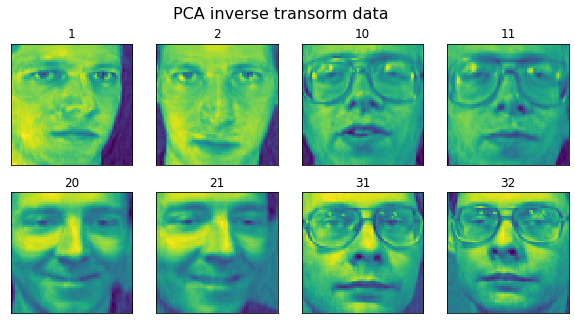

In [76]:
data_inverse=pca.inverse_transform(data_pca)
plot_gallery("PCA inverse transorm data",data_inverse,fig_index,fig_row,fig_col)

Po kompresji do 200 pikseli i otworzeniu obrazów wyniki są zaskakująco podobne do pierwotnych grafik, w oddaleniu nie widać zbyt dużych różnic. 

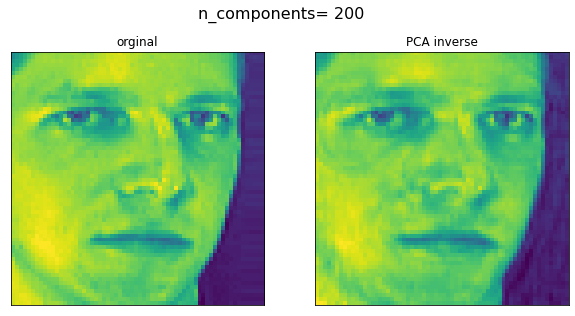

In [89]:
plot_two(faces.data,data_inverse,1,"n_components= " + str(n_comp),"orginal","PCA inverse")

Widać że PCA nauczyło się ze na niektórych zdjęciach występują okulary. Na drugim obrazku próbuje je odtworzyć. 

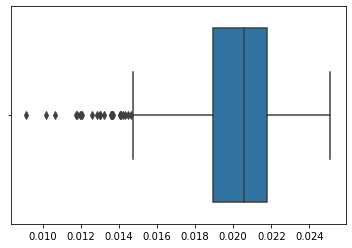

In [154]:
plot_rmse_error(faces.data,data_inverse)

Błędy MRSE obliczone po inversji z kopresji PCA dla każdego obrazka.Błędy przyjmują małe wartości, mediana na poziomie ok 0,021. Należy jednak pamiętać ze dane mają małe wartości (piekle z zakresu 0-1)

### Modyfikowane obrazy

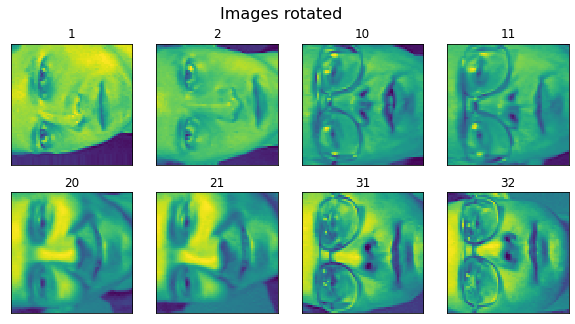

In [160]:
data_rotated_90=[]
n=len(faces.images)
for i in range(n):
    data_rotated_90.append(faces.images[i].transpose().reshape(4096))
plot_gallery("Images rotated",data_rotated_90,fig_index,fig_row,fig_col)    

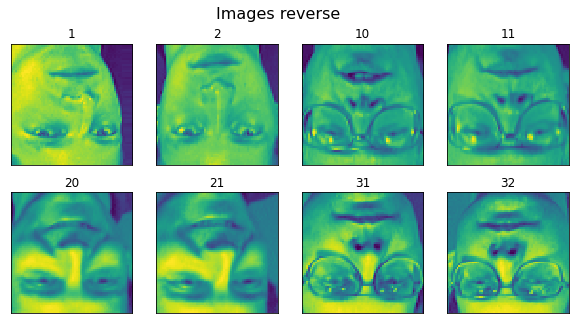

In [161]:
data_reverse=[]
n=len(faces.images)
for i in range(n):
    data_reverse.append(faces.images[i][::-1].reshape(4096))
plot_gallery("Images reverse ",data_reverse,fig_index,fig_row,fig_col)    

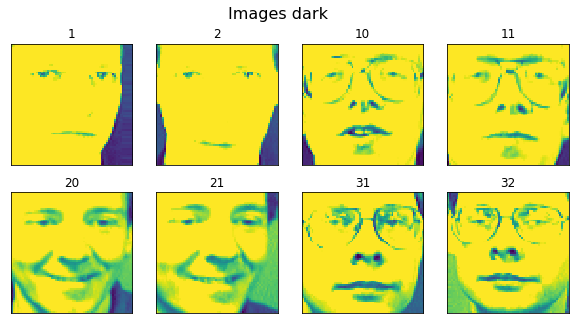

In [162]:
data_dark=[]
n=len(faces.images)
for i in range(n):
    l=faces.images[i].reshape(4096) 
#     l+=0.5
    for j in range(4096):
        l[j]+=0.5
        if l[j] >=1:
            l[j]=1
    data_dark.append(l)
    
plot_gallery("Images dark ",data_dark,fig_index,fig_row,fig_col)    

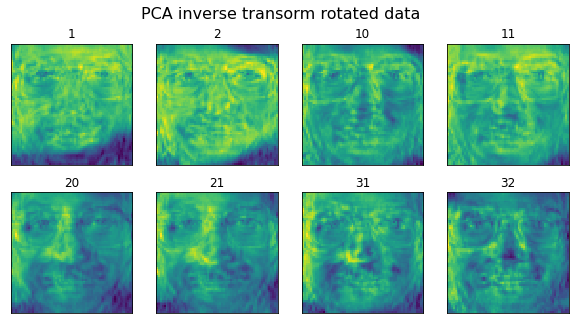

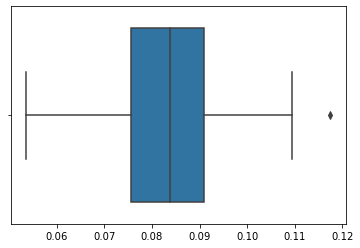

In [166]:
data_rotated_90_inverse=pca.inverse_transform(pca.transform(data_rotated_90))
plot_gallery("PCA inverse transorm rotated data",data_rotated_90_inverse,fig_index,fig_row,fig_col)
plot_rmse_error(data_rotated_90,data_rotated_90_inverse,"RMSE for PCA inverse transorm rotated data")

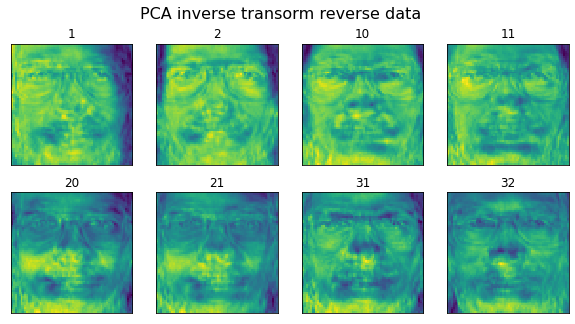

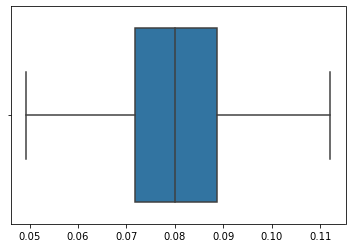

In [167]:
data_reverse_inverse=pca.inverse_transform(pca.transform(data_reverse))
plot_gallery("PCA inverse transorm reverse data",data_reverse_inverse,fig_index,fig_row,fig_col)
plot_rmse_error(data_reverse,data_reverse_inverse,"RMSE for PCA inverse transorm reverse data")

Zdjęcia teraz wyglądają ciekawie, choć już nie bardzo przypominają te oryginalne. RMSE około 5\4(mediana) razy większe niż w pierwszym przypadku. 

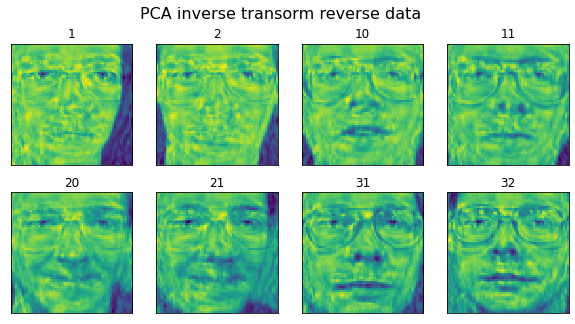

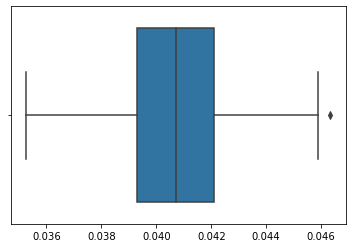

In [168]:
data_dark_inverse=pca.inverse_transform(pca.transform(data_dark))
plot_gallery("PCA inverse transorm reverse data",data_dark_inverse,fig_index,fig_row,fig_col)
plot_rmse_error(data_dark,data_dark_inverse,"RMSE for PCA inverse transorm dark data")

Ten przypadek wydaje się łatwiejszy, piksele nie zamieniają się miejscami jedynie są przeskalowane w górę i w części przypadków ucięte do 1. Jednak i tak RMSE (mediana) jest około dwukrotnie większa niż dla procesu dal danych niezmodyfikowanych.

### Wykrywanie anomalii 
Jak widać z powyższych przykładów gdy do wytrenowanego PCA na jakimś zbiorze podobnych grafik podamy „dziwne” zdjęcie. Następnie dokonamy transformacie odwrotną to otrzymamy wyższą miarę błędu niż w przypadku  zdjęć standardowych.